In [1]:
from google.colab import files
uploaded = files.upload()


Saving 02 Churn-Dataset.xlsx to 02 Churn-Dataset.xlsx


In [2]:
import pandas as pd

# Load the Excel file
file_path = "02 Churn-Dataset.xlsx"  # Make sure the filename matches exactly
df = pd.read_excel(file_path)

# Display first few rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0          

In [3]:
# Display dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Show summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['Churn'] = df['Churn'].astype(str).str.strip()  # Remove extra spaces
df['Churn'] = df['Churn'].replace({'': None, ' ': None, 'nan': None})  # Replace empty values with NaN


In [5]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
# Drop customerID as it's irrelevant
df.drop(columns=['customerID'], inplace=True)


In [6]:
# Convert TotalCharges to numeric (forcing errors='coerce' to handle empty values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values (if any) with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


<ipython-input-6-5fae6686a828>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [7]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_features)


Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [8]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']:
    print(f"{col}: {df[col].unique()}")


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [9]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Convert Yes/No and Male/Female to 0/1
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})  # Female → 1, Male → 0
for col in binary_cols[1:]:  # Skip 'gender' as it's already handled
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [10]:
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})


In [11]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


In [12]:
internet_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_features:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})


In [13]:
print(df.dtypes)  # Should only show int64 or float64
print(df.head())  # Confirm encoding


customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
numAdminTickets                            int64
numTechTickets                             int64
Churn                                      int64
InternetService_Fibe

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Train-Test Split Successful! Ready for Model Training.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


✅ Train-Test Split Successful! Ready for Model Training.
Training set size: (5634, 26)
Testing set size: (1409, 26)


## **RANDOM FOREST AND FEATURE IMPORTANCE**

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with controlled depth to avoid overfitting
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


ValueError: could not convert string to float: '4950-BDEUX'

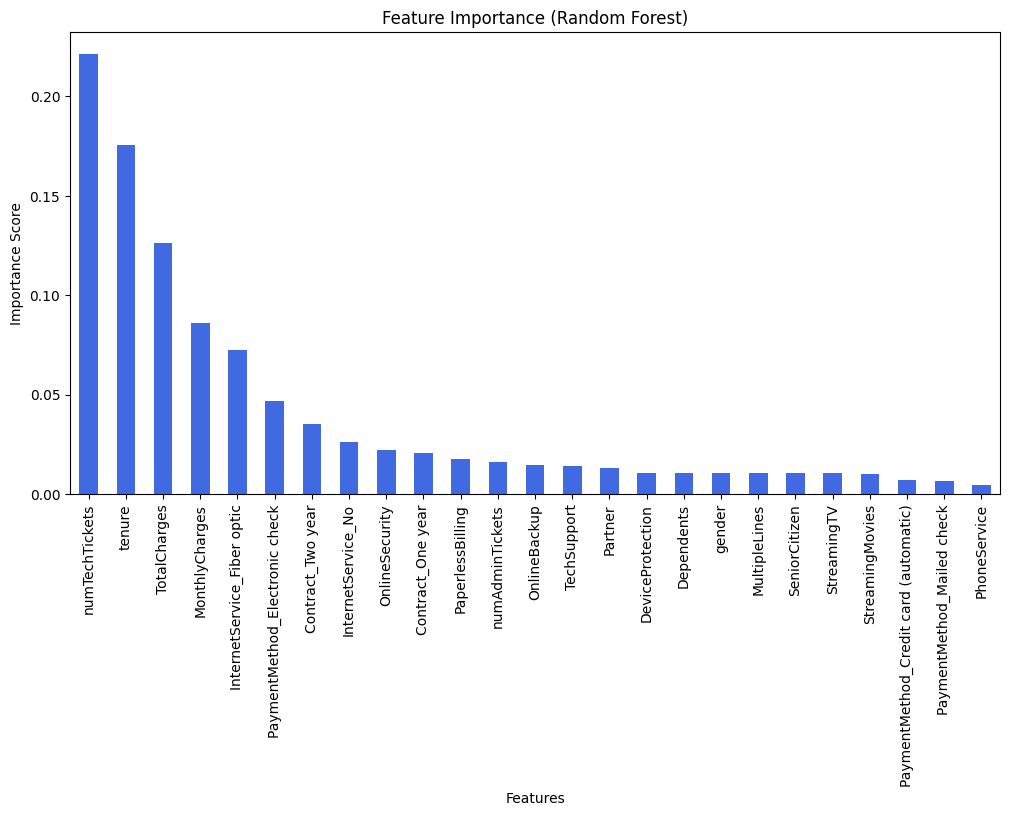

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort by importance
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar', color='royalblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Score
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1035
           1       0.76      0.68      0.72       374

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.86      0.86      0.86      1409

AUC-ROC Score: 0.9279805729933608


In [ ]:
# Identify low-importance features (threshold: importance < 0.01)
low_importance_features = feature_importance[feature_importance < 0.01].index
print("Dropping low-importance features:", low_importance_features.tolist())

# Drop these features from training and testing datasets
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Check new shapes
print("New training shape:", X_train_reduced.shape)
print("New testing shape:", X_test_reduced.shape)


Dropping low-importance features: ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'PhoneService']
New training shape: (5634, 22)
New testing shape: (1409, 22)


In [ ]:
# Retrain Random Forest with reduced features
rf_reduced = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf_reduced.predict(X_test_reduced)
y_pred_proba = rf_reduced.predict_proba(X_test_reduced)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1035
           1       0.77      0.66      0.71       374

    accuracy                           0.86      1409
   macro avg       0.83      0.79      0.81      1409
weighted avg       0.85      0.86      0.85      1409

AUC-ROC Score: 0.9289622568394947


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions on the test set
y_pred_reduced = rf_reduced.predict(X_test_reduced)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred_reduced)
print(f"✅ Model Accuracy on Test Set: {accuracy:.4f}")

# Print Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_reduced))

# Print Confusion Matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_reduced))


✅ Model Accuracy on Test Set: 0.8581

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1035
           1       0.77      0.66      0.71       374

    accuracy                           0.86      1409
   macro avg       0.83      0.79      0.81      1409
weighted avg       0.85      0.86      0.85      1409


🔍 Confusion Matrix:
[[962  73]
 [127 247]]


In [ ]:
import numpy as np

# Example input: Modify these values based on the features in X_train_reduced
sample_customer = np.array([[
    1,    # gender (Female=1, Male=0)
    0,    # SeniorCitizen (0 = No, 1 = Yes)
    1,    # Partner (Yes=1, No=0)
    0,    # Dependents (Yes=1, No=0)
    12,   # tenure (Months with company)
    0,    # MultipleLines (Yes=1, No=0)
    1,    # OnlineSecurity (Yes=1, No=0)
    0,    # OnlineBackup (Yes=1, No=0)
    0,    # DeviceProtection (Yes=1, No=0)
    1,    # TechSupport (Yes=1, No=0)
    1,    # StreamingTV (Yes=1, No=0)
    0,    # StreamingMovies (Yes=1, No=0)
    1,    # PaperlessBilling (Yes=1, No=0)
    75.5, # MonthlyCharges
    900.5,# TotalCharges
    2,    # numAdminTickets
    1,    # numTechTickets
    1,    # InternetService_Fiber optic (1=Yes, 0=No)
    0,    # InternetService_No (1=Yes, 0=No)
    0,    # Contract_One year (1=Yes, 0=No)
    1,    # Contract_Two year (1=Yes, 0=No)
    0     # PaymentMethod_Electronic check (1=Yes, 0=No)
]])

# Ensure input shape matches X_train_reduced
sample_customer = np.array(sample_customer).reshape(1, -1)

# Predict churn probability
churn_prediction = rf_reduced.predict(sample_customer)[0]
churn_probability = rf_reduced.predict_proba(sample_customer)[0][1]

# Print result
print(f"\n🔮 Prediction for Sample Customer: {'Churn' if churn_prediction == 1 else 'No Churn'}")
print(f"📊 Churn Probability: {churn_probability:.4f}")



🔮 Prediction for Sample Customer: No Churn
📊 Churn Probability: 0.4611


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_reduced, y_train)

print("Class Distribution After SMOTE:", np.bincount(y_train_balanced))


Class Distribution After SMOTE: [4139 4139]


In [ ]:
rf_weighted = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight={0:1, 1:2}, random_state=42)
rf_weighted.fit(X_train_reduced, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=10, random_state=42)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, scale_pos_weight=2, random_state=42)
xgb.fit(X_train_reduced, y_train)
print(f"XGBoost Accuracy: {xgb.score(X_test_reduced, y_test):.4f}")


XGBoost Accuracy: 0.8495


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Get XGBoost predictions
y_pred_xgb = xgb.predict(X_test_reduced)
y_pred_xgb_proba = xgb.predict_proba(X_test_reduced)[:, 1]

# Classification Report
print("\n📊 Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# AUC-ROC Score
print("\n📈 AUC-ROC Score (XGBoost):", roc_auc_score(y_test, y_pred_xgb_proba))



📊 Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      1035
           1       0.69      0.79      0.74       374

    accuracy                           0.85      1409
   macro avg       0.80      0.83      0.82      1409
weighted avg       0.86      0.85      0.85      1409


📈 AUC-ROC Score (XGBoost): 0.9307990389831822


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reduced, y_train)

# Check new class distribution
print("Class distribution after SMOTE:", np.bincount(y_train_smote))


Class distribution after SMOTE: [4139 4139]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Random Forest on SMOTE-balanced data
rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_rf_smote = rf_smote.predict(X_test_reduced)
y_pred_rf_smote_proba = rf_smote.predict_proba(X_test_reduced)[:, 1]

# Evaluate model performance
print("\n📊 Classification Report (RF + SMOTE):\n", classification_report(y_test, y_pred_rf_smote))
print("\n📈 AUC-ROC Score (RF + SMOTE):", roc_auc_score(y_test, y_pred_rf_smote_proba))



📊 Classification Report (RF + SMOTE):
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      1035
           1       0.67      0.83      0.74       374

    accuracy                           0.84      1409
   macro avg       0.80      0.84      0.81      1409
weighted avg       0.86      0.84      0.85      1409


📈 AUC-ROC Score (RF + SMOTE): 0.9155571055826812


 TL;DR: Which Model to Use?
Use XGBoost → If the company wants to save money and only target the most likely churners.
Use Random Forest → If the company doesn’t care about cost and just wants to keep as many customers as possible.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
lr.fit(X_train_reduced, y_train)

y_pred_lr = lr.predict(X_test_reduced)
y_pred_proba_lr = lr.predict_proba(X_test_reduced)[:, 1]

print("📊 Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("📈 AUC-ROC Score (Logistic Regression):", roc_auc_score(y_test, y_pred_proba_lr))


📊 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      1035
           1       0.63      0.86      0.73       374

    accuracy                           0.83      1409
   macro avg       0.79      0.84      0.80      1409
weighted avg       0.86      0.83      0.84      1409

📈 AUC-ROC Score (Logistic Regression): 0.9266966338577592


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, class_weight='balanced', random_state=42)
lgb.fit(X_train_reduced, y_train)

y_pred_lgb = lgb.predict(X_test_reduced)
y_pred_proba_lgb = lgb.predict_proba(X_test_reduced)[:, 1]

print("📊 LightGBM Report:\n", classification_report(y_test, y_pred_lgb))
print("📈 AUC-ROC Score (LightGBM):", roc_auc_score(y_test, y_pred_proba_lgb))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=5, auto_class_weights="Balanced", verbose=0, random_seed=42)
cb.fit(X_train_reduced, y_train)

y_pred_cb = cb.predict(X_test_reduced)
y_pred_proba_cb = cb.predict_proba(X_test_reduced)[:, 1]

print("📊 CatBoost Report:\n", classification_report(y_test, y_pred_cb))
print("📈 AUC-ROC Score (CatBoost):", roc_auc_score(y_test, y_pred_proba_cb))


📊 CatBoost Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1035
           1       0.66      0.88      0.75       374

    accuracy                           0.85      1409
   macro avg       0.80      0.86      0.82      1409
weighted avg       0.87      0.85      0.85      1409

📈 AUC-ROC Score (CatBoost): 0.9344777700276422


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define Neural Network
nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_reduced.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn.fit(X_train_reduced, y_train, epochs=20, batch_size=32, validation_data=(X_test_reduced, y_test), verbose=1)

# Predict on test data
y_pred_nn = (nn.predict(X_test_reduced) > 0.5).astype(int)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6655 - loss: 16.4830 - val_accuracy: 0.7509 - val_loss: 1.0444
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7291 - loss: 1.8150 - val_accuracy: 0.7686 - val_loss: 1.0865
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7652 - loss: 1.1122 - val_accuracy: 0.4755 - val_loss: 2.7964
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7581 - loss: 1.2796 - val_accuracy: 0.8446 - val_loss: 0.3701
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7738 - loss: 1.5087 - val_accuracy: 0.8573 - val_loss: 0.3037
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7919 - loss: 0.9275 - val_accuracy: 0.7885 - val_loss: 2.1496
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 1.5213 - val_accuracy: 0.4940 - val_loss: 2.9459
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7494 - loss: 2.2204 - val_accuracy:

In [ ]:
# Store model performance
models = {
    "Logistic Regression": (y_pred_lr, y_pred_proba_lr),
    "LightGBM": (y_pred_lgb, y_pred_proba_lgb),
    "CatBoost": (y_pred_cb, y_pred_proba_cb),
    "Neural Network": (y_pred_nn.flatten(), None)  # Neural Network doesn't provide probabilities easily
}

# Compare performance
for model_name, (y_pred, y_proba) in models.items():
    print(f"\n📊 {model_name} Classification Report:\n", classification_report(y_test, y_pred))

    if y_proba is not None:
        print(f"📈 {model_name} AUC-ROC Score:", roc_auc_score(y_test, y_proba))



📊 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      1035
           1       0.63      0.86      0.73       374

    accuracy                           0.83      1409
   macro avg       0.79      0.84      0.80      1409
weighted avg       0.86      0.83      0.84      1409

📈 Logistic Regression AUC-ROC Score: 0.9266966338577592

📊 LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      1035
           1       0.66      0.84      0.74       374

    accuracy                           0.84      1409
   macro avg       0.80      0.84      0.81      1409
weighted avg       0.86      0.84      0.85      1409

📈 LightGBM AUC-ROC Score: 0.9298302720297605

📊 CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1035
           1     

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reduced, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Train all models on SMOTE-balanced data
lr = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42).fit(X_train_smote, y_train_smote)
lgb = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, class_weight='balanced', random_state=42).fit(X_train_smote, y_train_smote)
cb = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=5, auto_class_weights="Balanced", verbose=0, random_seed=42).fit(X_train_smote, y_train_smote)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X_train_smote, y_train_smote)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble (Soft Voting)
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('lgb', lgb), ('cb', cb), ('rf', rf)],
    voting='soft'  # Soft voting averages probabilities
)

# Train the ensemble model
ensemble.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ensemble = ensemble.predict(X_test_reduced)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities
y_pred_ensemble_proba = ensemble.predict_proba(X_test_reduced)[:, 1]

# Classification report
print("\n📊 Ensemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))

# AUC-ROC Score
print("\n📈 AUC-ROC Score (Ensemble Model):", roc_auc_score(y_test, y_pred_ensemble_proba))



📊 Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1035
           1       0.67      0.82      0.74       374

    accuracy                           0.85      1409
   macro avg       0.80      0.84      0.81      1409
weighted avg       0.86      0.85      0.85      1409


📈 AUC-ROC Score (Ensemble Model): 0.9241649228861504


In [ ]:
import pandas as pd

# Sample data
sample_data = pd.DataFrame({
    "gender": ["Female", "Male"],
    "SeniorCitizen": [0, 0],
    "Partner": ["Yes", "No"],
    "Dependents": ["No", "No"],
    "tenure": [1, 34],
    "PhoneService": ["No", "Yes"],
    "MultipleLines": ["No phone service", "No"],
    "InternetService": ["DSL", "DSL"],
    "OnlineSecurity": ["No", "Yes"],
    "OnlineBackup": ["Yes", "No"],
    "DeviceProtection": ["No", "Yes"],
    "TechSupport": ["No", "No"],
    "StreamingTV": ["No", "No"],
    "StreamingMovies": ["No", "No"],
    "Contract": ["Month-to-month", "One year"],
    "PaperlessBilling": ["Yes", "No"],
    "PaymentMethod": ["Electronic check", "Mailed check"],
    "MonthlyCharges": [29.85, 56.95],
    "TotalCharges": [29.85, 1889.5],
    "numAdminTickets": [0, 0],
    "numTechTickets": [0, 0]
})

# Apply the same preprocessing as on training data
sample_data_processed = pd.get_dummies(sample_data)  # One-Hot Encoding

# Ensure sample data has the same features as X_train_reduced
missing_cols = set(X_train_reduced.columns) - set(sample_data_processed.columns)
for col in missing_cols:
    sample_data_processed[col] = 0  # Add missing columns with default value

# Ensure column order matches training data
sample_data_processed = sample_data_processed[X_train_reduced.columns]


In [ ]:
# Test with Random Forest (SMOTE-trained)
rf_prediction = rf_smote.predict(sample_data_processed)
rf_proba = rf_smote.predict_proba(sample_data_processed)[:, 1]

# Test with XGBoost
xgb_prediction = xgb.predict(sample_data_processed)
xgb_proba = xgb.predict_proba(sample_data_processed)[:, 1]

# Print results
print("\n🔍 Predictions for Sample Data:")
for i in range(len(sample_data)):
    print(f"📌 Customer {i+1}:")
    print(f"   - Random Forest: {'Churn' if rf_prediction[i] == 1 else 'No Churn'} (Probability: {rf_proba[i]:.4f})")
    print(f"   - XGBoost: {'Churn' if xgb_prediction[i] == 1 else 'No Churn'} (Probability: {xgb_proba[i]:.4f})")
    print("-" * 50)



🔍 Predictions for Sample Data:
📌 Customer 1:
   - Random Forest: Churn (Probability: 0.8487)
   - XGBoost: Churn (Probability: 0.7394)
--------------------------------------------------
📌 Customer 2:
   - Random Forest: No Churn (Probability: 0.2280)
   - XGBoost: No Churn (Probability: 0.0440)
--------------------------------------------------


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Sample data
sample_data = pd.DataFrame({
    "gender": ["Female", "Male"],
    "SeniorCitizen": [0, 0],
    "Partner": ["Yes", "No"],
    "Dependents": ["No", "No"],
    "tenure": [1, 34],
    "PhoneService": ["No", "Yes"],
    "MultipleLines": ["No phone service", "No"],
    "InternetService": ["DSL", "DSL"],
    "OnlineSecurity": ["No", "Yes"],
    "OnlineBackup": ["Yes", "No"],
    "DeviceProtection": ["No", "Yes"],
    "TechSupport": ["No", "No"],
    "StreamingTV": ["No", "No"],
    "StreamingMovies": ["No", "No"],
    "Contract": ["Month-to-month", "One year"],
    "PaperlessBilling": ["Yes", "No"],
    "PaymentMethod": ["Electronic check", "Mailed check"],
    "MonthlyCharges": [29.85, 56.95],
    "TotalCharges": [29.85, 1889.5],
    "numAdminTickets": [0, 0],
    "numTechTickets": [0, 0]
})

# Apply the same preprocessing as on training data
sample_data_processed = pd.get_dummies(sample_data)  # One-Hot Encoding

# Ensure sample data has the same features as X_train_reduced
missing_cols = set(X_train_reduced.columns) - set(sample_data_processed.columns)
for col in missing_cols:
    sample_data_processed[col] = 0  # Add missing columns with default value

# Ensure column order matches training data
sample_data_processed = sample_data_processed[X_train_reduced.columns]


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'iterations': [500, 1000],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size of weight updates
    'depth': [4, 6, 8],  # Depth of trees (higher = more complex)
    'l2_leaf_reg': [3, 5, 7]  # L2 regularization to prevent overfitting
}

# Initialize CatBoost model
cb = CatBoostClassifier(auto_class_weights="Balanced", verbose=0, random_seed=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(cb, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

# Print best parameters
print("✅ Best Parameters Found:", grid_search.best_params_)
print("📈 Best AUC-ROC Score:", grid_search.best_score_)


✅ Best Parameters Found: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
📈 Best AUC-ROC Score: 0.9278472942215185


In [ ]:
# Use the best parameters from GridSearch
best_params = grid_search.best_params_

# Train the best CatBoost model
best_catboost = CatBoostClassifier(**best_params, auto_class_weights="Balanced", verbose=100, random_seed=42)
best_catboost.fit(X_train_reduced, y_train)

# Predict on test set
y_pred_best_cb = best_catboost.predict(X_test_reduced)
y_pred_proba_best_cb = best_catboost.predict_proba(X_test_reduced)[:, 1]

# Evaluate model performance
from sklearn.metrics import classification_report, roc_auc_score

print("\n📊 Classification Report (Fine-Tuned CatBoost):\n", classification_report(y_test, y_pred_best_cb))
print("📈 AUC-ROC Score (Fine-Tuned CatBoost):", roc_auc_score(y_test, y_pred_proba_best_cb))


0:	learn: 0.6849115	total: 5.96ms	remaining: 5.96s
100:	learn: 0.3977637	total: 581ms	remaining: 5.17s
200:	learn: 0.3526993	total: 1.32s	remaining: 5.26s
300:	learn: 0.3345936	total: 1.78s	remaining: 4.14s
400:	learn: 0.3230180	total: 2.1s	remaining: 3.14s
500:	learn: 0.3134536	total: 2.43s	remaining: 2.42s
600:	learn: 0.3057505	total: 2.76s	remaining: 1.83s
700:	learn: 0.2994227	total: 3.09s	remaining: 1.32s
800:	learn: 0.2933984	total: 3.41s	remaining: 847ms
900:	learn: 0.2869078	total: 3.75s	remaining: 412ms
999:	learn: 0.2804156	total: 4.09s	remaining: 0us

📊 Classification Report (Fine-Tuned CatBoost):
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1035
           1       0.65      0.90      0.76       374

    accuracy                           0.85      1409
   macro avg       0.81      0.86      0.82      1409
weighted avg       0.88      0.85      0.85      1409

📈 AUC-ROC Score (Fine-Tuned CatBoost): 0.935849544033687

In [ ]:
best_catboost = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.01,
    depth=6,
    auto_class_weights="Balanced",
    random_seed=42,
    early_stopping_rounds=100  # Stops training if no improvement in 100 rounds
)

best_catboost.fit(X_train_reduced, y_train, eval_set=(X_test_reduced, y_test), verbose=100)


0:	learn: 0.6849115	test: 0.6848969	best: 0.6848969 (0)	total: 19.4ms	remaining: 38.7s
100:	learn: 0.3977637	test: 0.3938066	best: 0.3938066 (100)	total: 1.66s	remaining: 31.3s
200:	learn: 0.3526993	test: 0.3500670	best: 0.3500670 (200)	total: 3.87s	remaining: 34.6s
300:	learn: 0.3345936	test: 0.3353360	best: 0.3353360 (300)	total: 4.78s	remaining: 27s
400:	learn: 0.3230180	test: 0.3275952	best: 0.3275952 (400)	total: 5.78s	remaining: 23.1s
500:	learn: 0.3134536	test: 0.3231491	best: 0.3231380 (499)	total: 6.92s	remaining: 20.7s
600:	learn: 0.3057505	test: 0.3202562	best: 0.3202317 (598)	total: 7.8s	remaining: 18.2s
700:	learn: 0.2994227	test: 0.3185573	best: 0.3185573 (700)	total: 8.78s	remaining: 16.3s
800:	learn: 0.2933984	test: 0.3174869	best: 0.3174386 (797)	total: 10s	remaining: 15s
900:	learn: 0.2869078	test: 0.3163572	best: 0.3163572 (900)	total: 10.9s	remaining: 13.3s
1000:	learn: 0.2803175	test: 0.3158042	best: 0.3155116 (963)	total: 11.7s	remaining: 11.7s
1100:	learn: 0.2736

In [ ]:
from hyperopt import hp, fmin, tpe, Trials
from catboost import CatBoostClassifier

# Define search space
space = {
    'iterations': hp.choice('iterations', [500, 1000, 1500]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'depth': hp.choice('depth', [4, 6, 8, 10]),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10)
}

# Objective function
def objective(params):
    model = CatBoostClassifier(**params, auto_class_weights="Balanced", verbose=0, random_seed=42)
    model.fit(X_train_reduced, y_train, eval_set=(X_test_reduced, y_test), early_stopping_rounds=50, verbose=0)
    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    return -roc_auc_score(y_test, y_pred_proba)  # Minimize negative AUC-ROC

# Run Hyperopt Optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

print("✅ Best Hyperparameters:", best)


100%|██████████| 20/20 [00:45<00:00,  2.26s/trial, best loss: -0.9368428530832622]
✅ Best Hyperparameters: {'depth': 0, 'iterations': 2, 'l2_leaf_reg': 1.7753592705095764, 'learning_rate': 0.0879549987174874}


# FEATURE ENGINEERING

In [ ]:
import pandas as pd

# ✅ 1. Create AvgMonthlySpend Feature (TotalCharges / Tenure)
X_train_reduced["AvgMonthlySpend"] = X_train_reduced["TotalCharges"] / (X_train_reduced["tenure"] + 1)  # Avoid divide by zero
X_test_reduced["AvgMonthlySpend"] = X_test_reduced["TotalCharges"] / (X_test_reduced["tenure"] + 1)

# ✅ 2. Create TenureGroup Feature (Categorical Grouping)
def tenure_group(tenure):
    if tenure <= 12:
        return "New"
    elif tenure <= 36:
        return "Medium"
    else:
        return "Long-term"

X_train_reduced["TenureGroup"] = X_train_reduced["tenure"].apply(tenure_group)
X_test_reduced["TenureGroup"] = X_test_reduced["tenure"].apply(tenure_group)

# One-Hot Encode TenureGroup
X_train_reduced = pd.get_dummies(X_train_reduced, columns=["TenureGroup"])
X_test_reduced = pd.get_dummies(X_test_reduced, columns=["TenureGroup"])

# ✅ 3. Create TotalSupportTickets Feature
X_train_reduced["TotalSupportTickets"] = X_train_reduced["numAdminTickets"] + X_train_reduced["numTechTickets"]
X_test_reduced["TotalSupportTickets"] = X_test_reduced["numAdminTickets"] + X_test_reduced["numTechTickets"]

# ✅ 4. Combine StreamingTV & StreamingMovies into HasStreamingService Feature
X_train_reduced["HasStreamingService"] = ((X_train_reduced["StreamingTV"] == 1) | (X_train_reduced["StreamingMovies"] == 1)).astype(int)
X_test_reduced["HasStreamingService"] = ((X_test_reduced["StreamingTV"] == 1) | (X_test_reduced["StreamingMovies"] == 1)).astype(int)

# ✅ 5. Convert Contract Type into Numeric Values
# Instead of "Contract", use the one-hot encoded versions
X_train_reduced["ContractType"] = (
    X_train_reduced["Contract_One year"] * 1 + X_train_reduced["Contract_Two year"] * 2
)
X_test_reduced["ContractType"] = (
    X_test_reduced["Contract_One year"] * 1 + X_test_reduced["Contract_Two year"] * 2
)



In [ ]:
# Remove duplicate columns if they exist
X_train_reduced = X_train_reduced.loc[:, ~X_train_reduced.columns.duplicated()]
X_test_reduced = X_test_reduced.loc[:, ~X_test_reduced.columns.duplicated()]


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Use the best parameters from fine-tuning
best_catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    auto_class_weights="Balanced",
    random_seed=42,
    early_stopping_rounds=100,
    verbose=100
)

# Train on the updated dataset
best_catboost.fit(X_train_reduced, y_train, eval_set=(X_test_reduced, y_test), verbose=100)

# Predict on the test set
y_pred_best_cb = best_catboost.predict(X_test_reduced)
y_pred_proba_best_cb = best_catboost.predict_proba(X_test_reduced)[:, 1]

# Evaluate the model
print("\n📊 Classification Report (CatBoost After Feature Engineering):\n", classification_report(y_test, y_pred_best_cb))
print("📈 AUC-ROC Score (After Feature Engineering):", roc_auc_score(y_test, y_pred_proba_best_cb))


0:	learn: 0.6844507	test: 0.6846560	best: 0.6846560 (0)	total: 4.41ms	remaining: 4.4s
100:	learn: 0.3969839	test: 0.3969678	best: 0.3969678 (100)	total: 391ms	remaining: 3.48s
200:	learn: 0.3514509	test: 0.3517375	best: 0.3517375 (200)	total: 768ms	remaining: 3.05s
300:	learn: 0.3334460	test: 0.3371260	best: 0.3371260 (300)	total: 1.15s	remaining: 2.67s
400:	learn: 0.3215109	test: 0.3301521	best: 0.3301521 (400)	total: 1.53s	remaining: 2.28s
500:	learn: 0.3123493	test: 0.3261496	best: 0.3261252 (498)	total: 1.9s	remaining: 1.89s
600:	learn: 0.3051429	test: 0.3236307	best: 0.3236307 (600)	total: 2.28s	remaining: 1.51s
700:	learn: 0.2981048	test: 0.3214563	best: 0.3214563 (700)	total: 2.65s	remaining: 1.13s
800:	learn: 0.2918399	test: 0.3202935	best: 0.3202934 (799)	total: 3.02s	remaining: 751ms
900:	learn: 0.2851840	test: 0.3193254	best: 0.3192861 (899)	total: 3.4s	remaining: 374ms
999:	learn: 0.2783056	test: 0.3185510	best: 0.3185510 (999)	total: 3.78s	remaining: 0us

bestTest = 0.3185

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reduced, y_train)

# Print new class distribution after SMOTE
print("Class distribution after SMOTE:", pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64


In [ ]:
# Train CatBoost on SMOTE-balanced data
catboost_smote = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    auto_class_weights="Balanced",
    random_seed=42,
    early_stopping_rounds=100,
    verbose=100
)

catboost_smote.fit(X_train_smote, y_train_smote, eval_set=(X_test_reduced, y_test), verbose=100)

# Predict on test set
y_pred_cb_smote = catboost_smote.predict(X_test_reduced)
y_pred_proba_cb_smote = catboost_smote.predict_proba(X_test_reduced)[:, 1]

# Evaluate model performance
print("\n📊 Classification Report (CatBoost + SMOTE):\n", classification_report(y_test, y_pred_cb_smote))
print("📈 AUC-ROC Score (CatBoost + SMOTE):", roc_auc_score(y_test, y_pred_proba_cb_smote))


0:	learn: 0.6833351	test: 0.6821842	best: 0.6821842 (0)	total: 4.97ms	remaining: 4.96s
100:	learn: 0.3635182	test: 0.3716635	best: 0.3716635 (100)	total: 997ms	remaining: 8.88s
200:	learn: 0.3165033	test: 0.3466291	best: 0.3466291 (200)	total: 1.82s	remaining: 7.24s
300:	learn: 0.2964049	test: 0.3370231	best: 0.3370101 (298)	total: 3.39s	remaining: 7.87s
400:	learn: 0.2828204	test: 0.3311768	best: 0.3311768 (400)	total: 4.56s	remaining: 6.81s
500:	learn: 0.2732438	test: 0.3274581	best: 0.3274581 (500)	total: 6.12s	remaining: 6.1s
600:	learn: 0.2647846	test: 0.3243521	best: 0.3243521 (600)	total: 7.57s	remaining: 5.02s
700:	learn: 0.2580615	test: 0.3218266	best: 0.3218083 (699)	total: 9.27s	remaining: 3.95s
800:	learn: 0.2517703	test: 0.3200895	best: 0.3200895 (800)	total: 10.7s	remaining: 2.65s
900:	learn: 0.2458470	test: 0.3188067	best: 0.3188067 (900)	total: 11.5s	remaining: 1.26s
999:	learn: 0.2395776	test: 0.3179680	best: 0.3178858 (984)	total: 12.9s	remaining: 0us

bestTest = 0.31

# CHECKING FOR OVERFITTING

In [ ]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(best_catboost, X_train_reduced, y_train, cv=5, scoring="roc_auc")
print("Cross-Validation AUC-ROC Scores:", cv_auc)
print("Mean AUC-ROC:", cv_auc.mean())


0:	learn: 0.6848614	total: 3.56ms	remaining: 3.56s
100:	learn: 0.4033005	total: 648ms	remaining: 5.77s
200:	learn: 0.3569620	total: 1.24s	remaining: 4.94s
300:	learn: 0.3375615	total: 1.73s	remaining: 4.01s
400:	learn: 0.3240803	total: 2.29s	remaining: 3.42s
500:	learn: 0.3144478	total: 2.83s	remaining: 2.82s
600:	learn: 0.3057141	total: 3.32s	remaining: 2.2s
700:	learn: 0.2975759	total: 4s	remaining: 1.71s
800:	learn: 0.2901750	total: 4.76s	remaining: 1.18s
900:	learn: 0.2820721	total: 6.18s	remaining: 680ms
999:	learn: 0.2741177	total: 7.11s	remaining: 0us
0:	learn: 0.6847116	total: 11.8ms	remaining: 11.8s
100:	learn: 0.4016765	total: 751ms	remaining: 6.68s
200:	learn: 0.3549393	total: 1.48s	remaining: 5.9s
300:	learn: 0.3364711	total: 2.54s	remaining: 5.91s
400:	learn: 0.3239363	total: 3.81s	remaining: 5.7s
500:	learn: 0.3146548	total: 5.08s	remaining: 5.06s
600:	learn: 0.3071026	total: 6.42s	remaining: 4.26s
700:	learn: 0.2993700	total: 7.82s	remaining: 3.34s
800:	learn: 0.2920573	

# TESTING USING CATBOOST

In [ ]:
import pandas as pd

# Create test sample data
test_sample = pd.DataFrame({
    "gender": ["Female", "Male", "Female", "Male"],
    "SeniorCitizen": [0, 1, 0, 1],
    "Partner": ["Yes", "No", "No", "Yes"],
    "Dependents": ["No", "No", "Yes", "No"],
    "tenure": [1, 24, 6, 60],  # Short & long tenure cases
    "PhoneService": ["No", "Yes", "Yes", "Yes"],
    "MultipleLines": ["No phone service", "No", "Yes", "Yes"],
    "InternetService": ["DSL", "Fiber optic", "DSL", "No"],
    "OnlineSecurity": ["No", "Yes", "No", "No internet service"],
    "OnlineBackup": ["Yes", "No", "Yes", "No internet service"],
    "DeviceProtection": ["No", "Yes", "No", "No internet service"],
    "TechSupport": ["No", "Yes", "No", "No internet service"],
    "StreamingTV": ["No", "Yes", "No", "No internet service"],
    "StreamingMovies": ["No", "Yes", "No", "No internet service"],
    "Contract": ["Month-to-month", "Two year", "One year", "Month-to-month"],
    "PaperlessBilling": ["Yes", "No", "Yes", "No"],
    "PaymentMethod": ["Electronic check", "Credit card (automatic)", "Mailed check", "Bank transfer (automatic)"],
    "MonthlyCharges": [29.85, 89.10, 45.00, 18.75],  # Low & high spending cases
    "TotalCharges": [29.85, 2150.35, 270.00, 1125.40],  # Customers with different total spending
    "numAdminTickets": [0, 3, 1, 0],  # Ticket history
    "numTechTickets": [0, 2, 0, 1]
})

print("✅ Test Sample Data Created!")


✅ Test Sample Data Created!


In [ ]:
# Apply the same preprocessing steps as the training data
test_sample_processed = pd.get_dummies(test_sample)

# Ensure test sample has the same features as X_train_reduced
missing_cols = set(X_train_reduced.columns) - set(test_sample_processed.columns)
for col in missing_cols:
    test_sample_processed[col] = 0  # Add missing columns with default value

# Ensure column order matches training data
test_sample_processed = test_sample_processed[X_train_reduced.columns]


In [ ]:
# Predict using trained CatBoost model
y_pred_test = best_catboost.predict(test_sample_processed)
y_pred_proba_test = best_catboost.predict_proba(test_sample_processed)[:, 1]

# Show predictions
for i in range(len(test_sample)):
    print(f"\n📌 Customer {i+1}:")
    print(f"   - Predicted Churn: {'⚠️ Churn' if y_pred_test[i] == 1 else '✅ No Churn'}")
    print(f"   - Churn Probability: {y_pred_proba_test[i]:.4f}")
    print("-" * 50)



📌 Customer 1:
   - Predicted Churn: ⚠️ Churn
   - Churn Probability: 0.7331
--------------------------------------------------

📌 Customer 2:
   - Predicted Churn: ⚠️ Churn
   - Churn Probability: 0.6583
--------------------------------------------------

📌 Customer 3:
   - Predicted Churn: ✅ No Churn
   - Churn Probability: 0.3616
--------------------------------------------------

📌 Customer 4:
   - Predicted Churn: ✅ No Churn
   - Churn Probability: 0.2762
--------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Train-Test Split (if not already done)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_reduced, y_train, test_size=0.2, random_state=42)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_preds = rf_model.predict_proba(X_valid)[:, 1]  # Get churn probabilities

# ✅ Train CatBoost
cb_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6, random_seed=42, verbose=100)
cb_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=100)
cb_train_preds = cb_model.predict_proba(X_valid)[:, 1]

# ✅ Create Stacking Dataset
stacked_train = np.column_stack((rf_train_preds, cb_train_preds))  # Combine RF & CB predictions


0:	learn: 0.6818488	test: 0.6815881	best: 0.6815881 (0)	total: 11.2ms	remaining: 11.2s
100:	learn: 0.3514444	test: 0.3421379	best: 0.3421379 (100)	total: 591ms	remaining: 5.26s
200:	learn: 0.3106389	test: 0.3082881	best: 0.3082881 (200)	total: 1.82s	remaining: 7.25s
300:	learn: 0.2934639	test: 0.2974446	best: 0.2974446 (300)	total: 2.19s	remaining: 5.1s
400:	learn: 0.2822191	test: 0.2917709	best: 0.2917709 (400)	total: 2.53s	remaining: 3.79s
500:	learn: 0.2735590	test: 0.2882957	best: 0.2882957 (500)	total: 2.85s	remaining: 2.84s
600:	learn: 0.2670609	test: 0.2863694	best: 0.2863694 (600)	total: 3.17s	remaining: 2.1s
700:	learn: 0.2607351	test: 0.2848220	best: 0.2848171 (699)	total: 3.51s	remaining: 1.5s
800:	learn: 0.2546062	test: 0.2833632	best: 0.2833554 (798)	total: 3.9s	remaining: 969ms
900:	learn: 0.2483340	test: 0.2823667	best: 0.2823667 (900)	total: 4.67s	remaining: 514ms
999:	learn: 0.2420595	test: 0.2821166	best: 0.2820746 (924)	total: 5.37s	remaining: 0us

bestTest = 0.28207

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# ✅ Train Logistic Regression as Meta-Model
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_valid)

# ✅ Predict on Validation Data
meta_preds = meta_model.predict(stacked_train)
meta_preds_proba = meta_model.predict_proba(stacked_train)[:, 1]

# ✅ Evaluate Performance
print("\n📊 Classification Report (Stacking Model):\n", classification_report(y_valid, meta_preds))
print("📈 AUC-ROC Score (Stacking Model):", roc_auc_score(y_valid, meta_preds_proba))



📊 Classification Report (Stacking Model):
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       839
           1       0.78      0.68      0.73       288

    accuracy                           0.87      1127
   macro avg       0.84      0.81      0.82      1127
weighted avg       0.86      0.87      0.87      1127

📈 AUC-ROC Score (Stacking Model): 0.9315301781221031
